<a href="https://colab.research.google.com/github/wa-le/cybersec-jobs-EDA/blob/master/cybersec_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sweetviz
!pip install pycountry

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()
%matplotlib inline
from random import choice as ch
import pycountry as pyc

In [6]:
df0 = pd.read_csv("/content/drive/MyDrive/Data/salaries_cyber.csv")
df0

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [7]:
# Using a copy of the DataFrame
df1 = df0.copy()

In [8]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [ ]:
#Quick insight of each col using sweetviz
import sweetviz as sv

report = sv.analyze(df1)
report.show_html()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [11]:
df1.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


In [12]:
df1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
df1["experience_level"].unique()

array(['EN', 'MI', 'EX', 'SE'], dtype=object)

In [14]:
df1["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [15]:
df1['experience_level'].replace({'EN':'Entry-Level', 'MI':'Mid-Level', 'EX':'Executive-Level', 'SE':'Senior'}, inplace=True)
df1['employment_type'].replace({'FT':'Full-Time', 'CT':'Contract', 'PT':'Part-Time', 'FL':'Freelance'}, inplace=True)
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Entry-Level,Full-Time,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,Mid-Level,Full-Time,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,Mid-Level,Full-Time,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,Mid-Level,Full-Time,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,Entry-Level,Contract,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,Mid-Level,Full-Time,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,Senior,Full-Time,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,Senior,Full-Time,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,Mid-Level,Full-Time,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [16]:
df1.job_title.value_counts().head(10)

Security Engineer                    194
Cyber Security Analyst               133
Penetration Tester                    70
Information Security Manager          64
Cyber Security Engineer               63
Security Analyst                      47
Information Security Analyst          39
Cyber Security Specialist             31
Cyber Threat Intelligence Analyst     29
Information Security Officer          28
Name: job_title, dtype: int64

# **TOP 10 Cyber Security Roles**







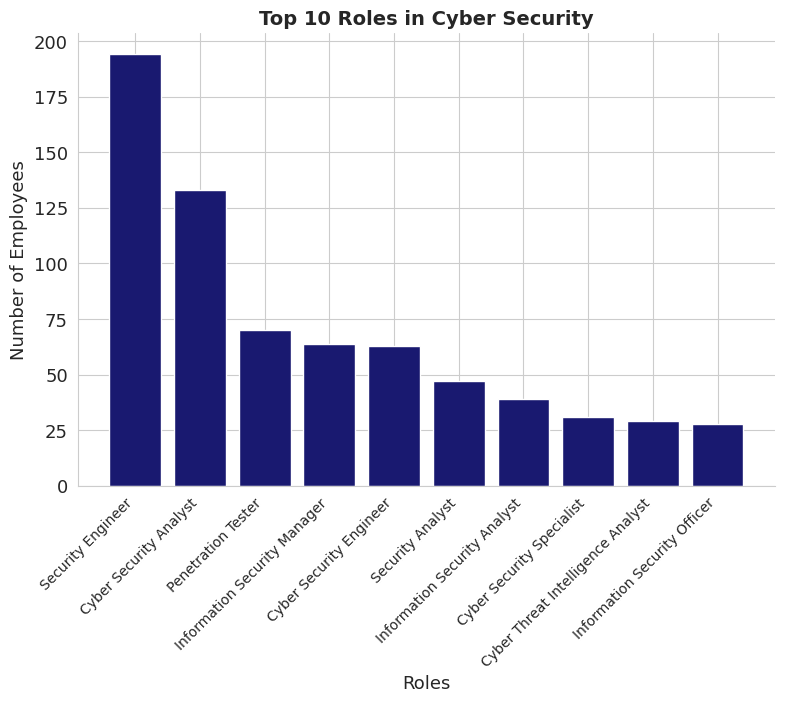

In [59]:

top_10_roles = df1.job_title.value_counts().head(10)
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
plt.bar(x=top_10_roles.index, height=top_10_roles.values, color='midnightblue')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=13)
plt.xlabel("Roles", fontsize=13)
plt.ylabel("Number of Employees", fontsize=13)
plt.title("Top 10 Roles in Cyber Security", fontsize=14, fontweight='bold')
#plt.savefig("10-cybersec-roles", dpi=300, bbox_inches='tight')
sns.despine(top='True', right='True')
plt.show()

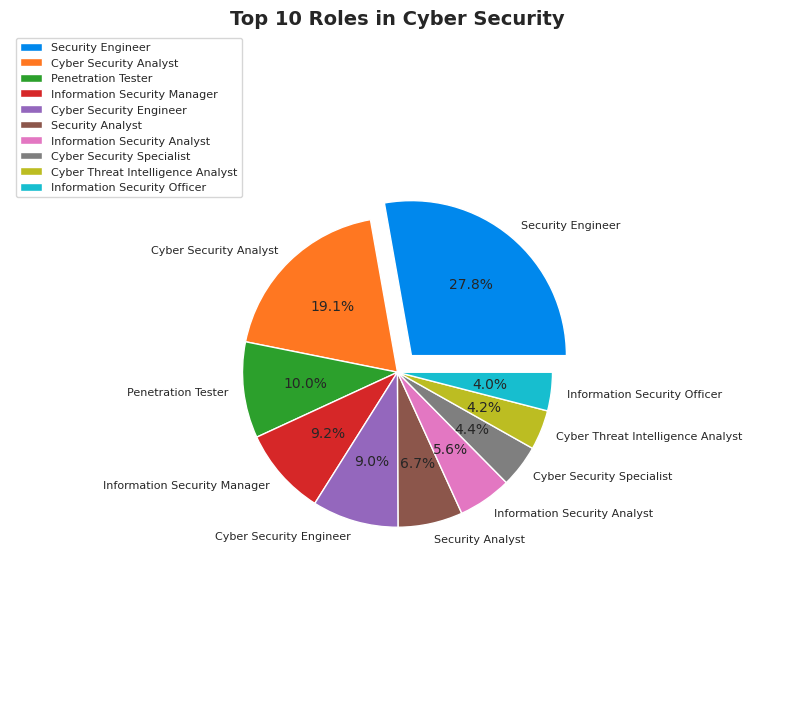

In [18]:
top_10_roles = df1.job_title.value_counts().head(10)
plt.figure(figsize= (10, 9))
plt.axis("equal")
mylabels = list(top_10_roles.index)
plt.pie(x=top_10_roles.values, labels=mylabels, radius=0.5, autopct='%.1f%%', explode=[0.07,0,0,0,0,0,0,0,0,0])
plt.title("Top 10 Roles in Cyber Security", fontsize=14, fontweight='bold')
plt.legend()
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
list(top_10_roles.index)

['Security Engineer',
 'Cyber Security Analyst',
 'Penetration Tester',
 'Information Security Manager',
 'Cyber Security Engineer',
 'Security Analyst',
 'Information Security Analyst',
 'Cyber Security Specialist',
 'Cyber Threat Intelligence Analyst',
 'Information Security Officer']

## **Pairwise Correlation of Columns**

In [20]:
df1.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Entry-Level,Full-Time,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,Mid-Level,Full-Time,Security Analyst,95000,USD,95000,US,0,US,M


In [21]:
df1.corr().style.background_gradient(cmap='coolwarm')

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,0.027042,0.184246,0.135720
salary,0.027042,1.000000,-0.033166,0.019112
salary_in_usd,0.184246,-0.033166,1.000000,0.174523
remote_ratio,0.135720,0.019112,0.174523,1.000000


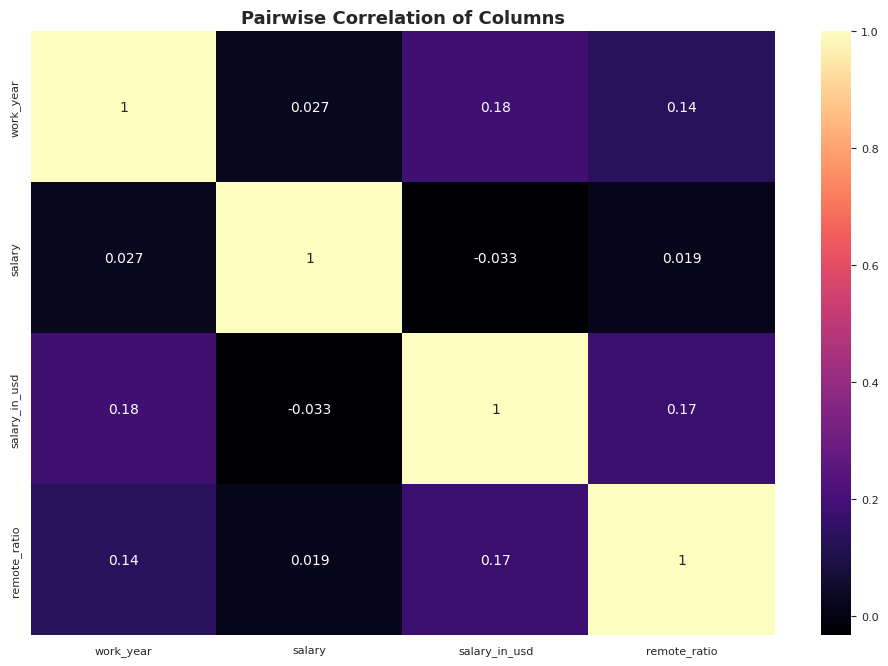

In [102]:
plt.figure(figsize=(12,8))
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
sns.heatmap(df1.corr(), annot=True, cmap=ch(cmaps))
plt.title("Pairwise Correlation of Columns", fontsize=13, fontweight='bold')
plt.show()

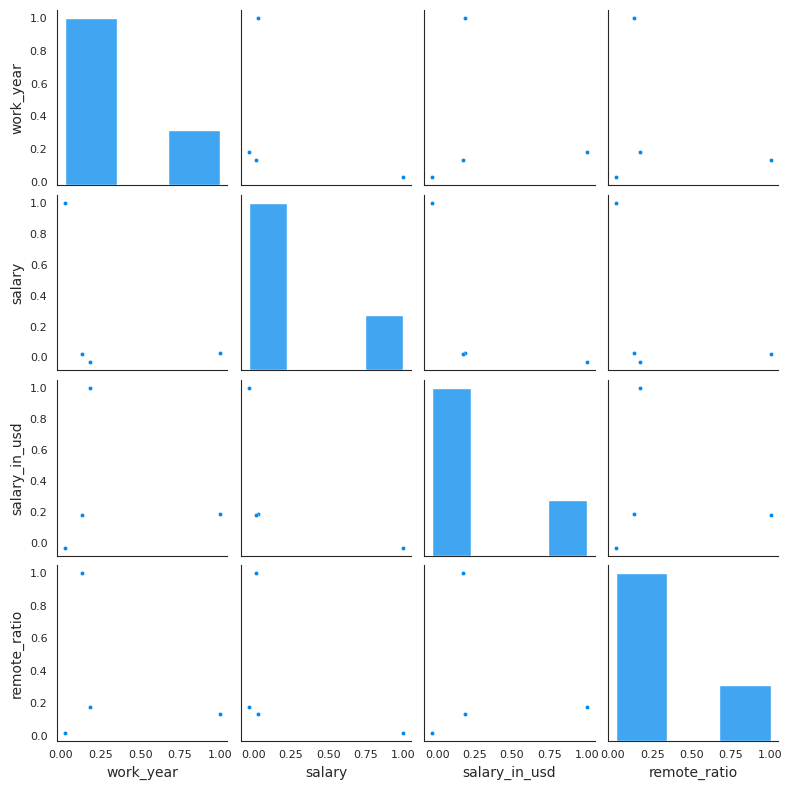

In [23]:
#Using Pairplot to check correlation
the_corr = df1.corr()
the_corr_pairplot = the_corr.dropna()
sns.pairplot(the_corr_pairplot, height=2)
plt.show()

# **Top 10 Highest Paid Roles In Cyber Security**

In [24]:
df2 = df1.copy()
highest_10 = df2.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10)

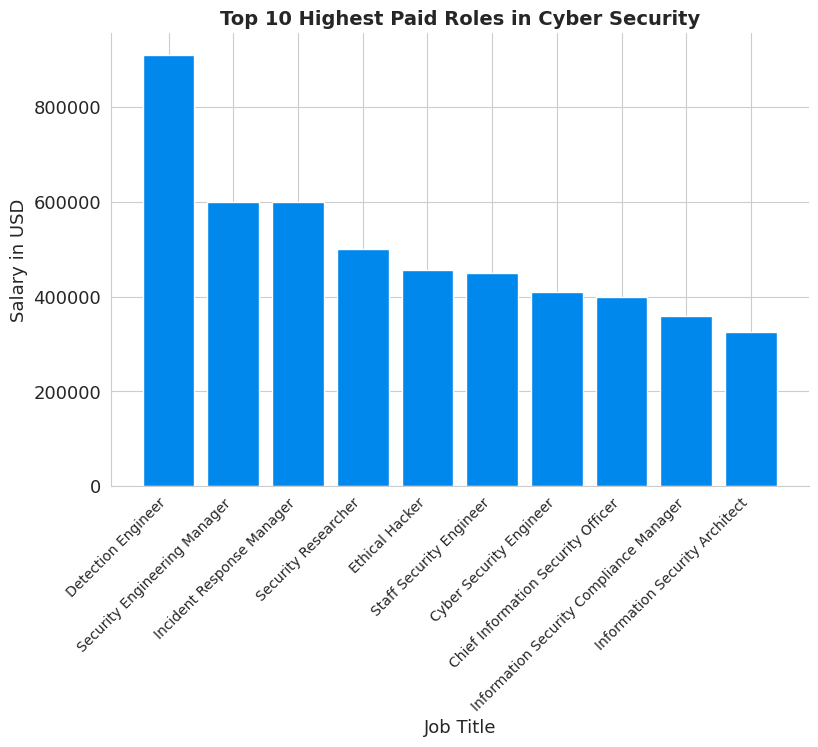

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
plt.bar(x=highest_10["job_title"], height=highest_10["salary_in_usd"])
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=13)
plt.xlabel("Job Title", fontsize=13)
plt.ylabel("Salary in USD", fontsize=13)
plt.title("Top 10 Highest Paid Roles in Cyber Security", fontsize=14, fontweight='bold')
sns.despine(top='True', right='True')
plt.show()

# **10 Lowest Paid Roles In Cyber Security**

In [26]:

lowest_10 = df2.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).tail(10)

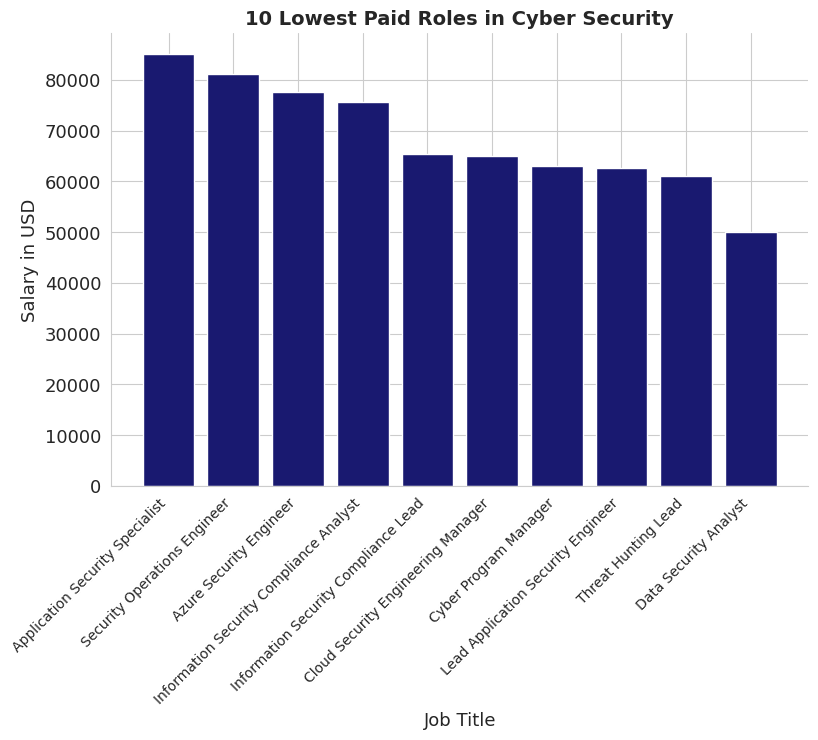

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
plt.bar(x=lowest_10["job_title"], height=lowest_10["salary_in_usd"], color='midnightblue')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=13)
plt.xlabel("Job Title", fontsize=13)
plt.ylabel("Salary in USD", fontsize=13)
plt.title("10 Lowest Paid Roles in Cyber Security", fontsize=14, fontweight='bold')
sns.despine(top='True', right='True')
plt.show()

# **Top 10 Roles Based on Average Pay**

In [28]:
avg_10 = df2.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10)
avg_10

,job_title,salary_in_usd
1,Application Security Architect,315000.000000
79,Staff Security Engineer,295000.000000
83,Threat Intelligence Response Analyst,260000.000000
59,Principal Application Security Engineer,237000.000000
77,Software Security Engineer,235540.000000
44,Information Security Compliance Manager,230000.000000
24,Detection Engineer,226310.266667
70,Security Incident Response Engineer,205666.666667
31,Head of Information Security,199388.833333
33,IAM Engineer,198333.333333


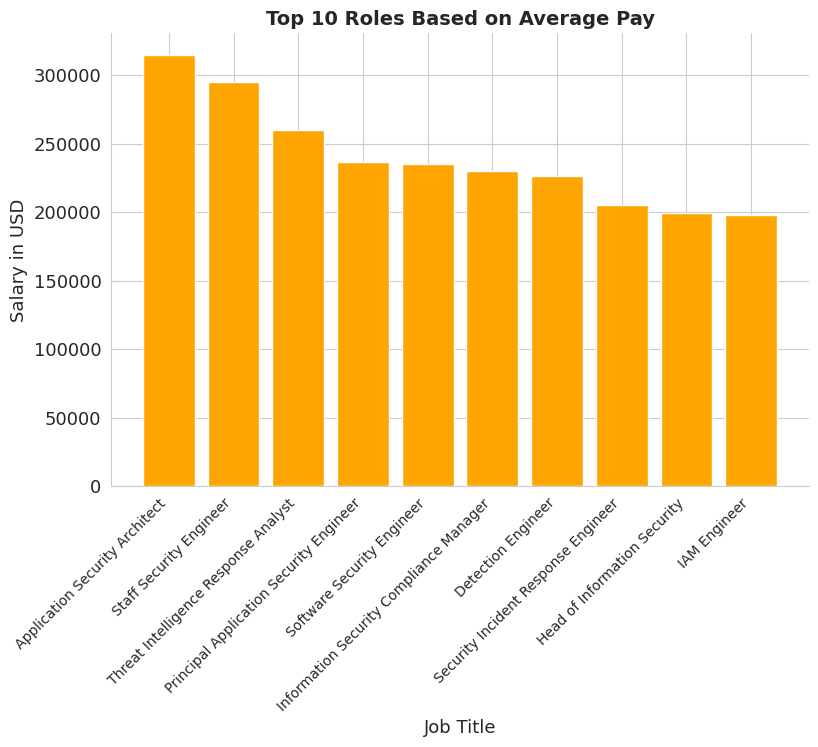

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
plt.bar(x=list(avg_10["job_title"]), height=list(avg_10["salary_in_usd"]), color='orange')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=13)
plt.xlabel("Job Title", fontsize=13)
plt.ylabel("Salary in USD", fontsize=13)
plt.title("Top 10 Roles Based on Average Pay", fontsize=14, fontweight='bold')
sns.despine(top='True', right='True')
plt.show()

# **Experience Level in Cyber Security**

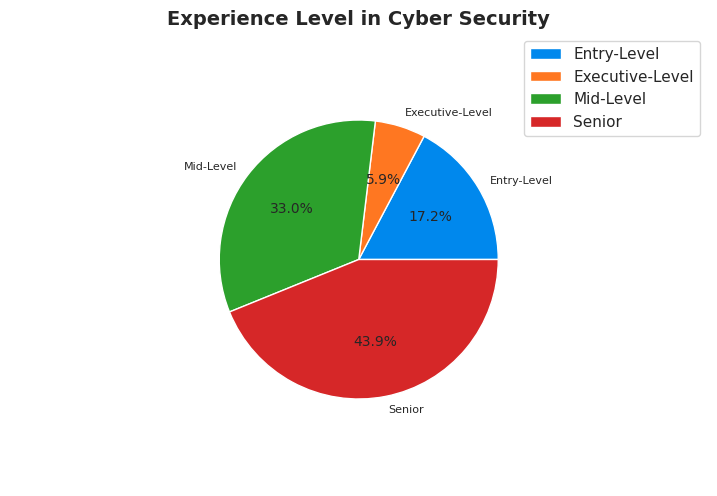

In [48]:
exp_level = df1.groupby('experience_level',as_index=False)['salary_in_usd'].count()
plt.figure(figsize= (9, 6))
plt.axis("equal")
mylabels = list(exp_level['experience_level'])
plt.pie(x=exp_level['salary_in_usd'], labels=mylabels, radius=0.5, autopct='%.1f%%', explode=[0,0,0,0])
plt.title("Experience Level in Cyber Security", fontsize=14, fontweight='bold')
plt.legend()
plt.show()

# **Distribution of Salary**

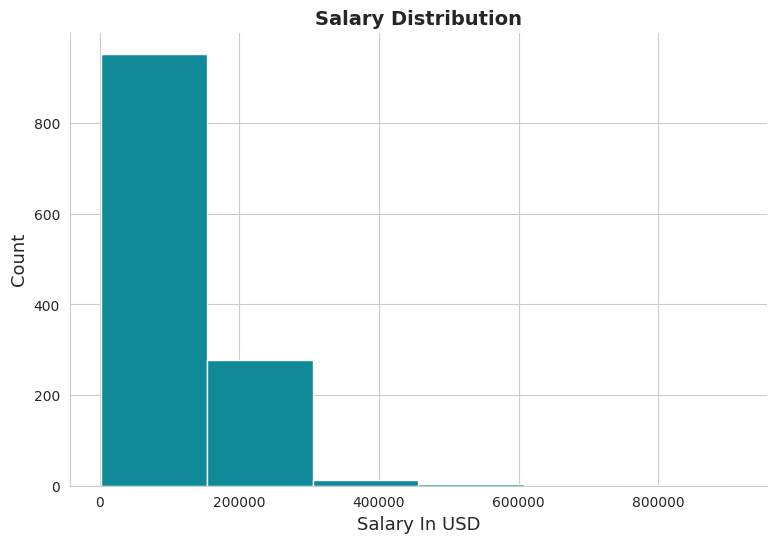

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
plt.hist(df1["salary_in_usd"],
         bins=6,
         color = "#108A99")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Salary In USD", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.title("Salary Distribution", fontsize=14, fontweight='bold')
sns.despine(top='True', right='True')
plt.show()

Top 10 Countries With The Highest Cyber Security Jobs

In [ ]:
max_jobs = df1.groupby('company_location', as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(5)
max_jobs['company_location'].replace({'US':'United States', 'GB':'Great Britain', 'CA':'Canada', 'DE':'Germany', 'IN':'India'}, inplace=True)

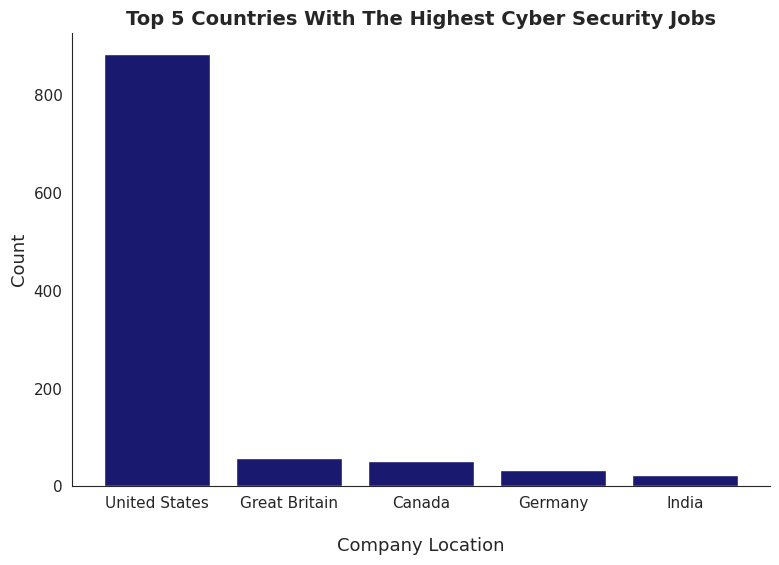

In [43]:
sns.set_style("white")
plt.figure(figsize= (9, 6))
plt.bar(x=max_jobs['company_location'], height=max_jobs['experience_level'], color='midnightblue')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("\nCompany Location", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.title("Top 5 Countries With The Highest Cyber Security Jobs", fontsize=14, fontweight='bold')
sns.despine(top='True', right='True')
plt.show()

# **Cyber Security Salary Based On Experience Level**

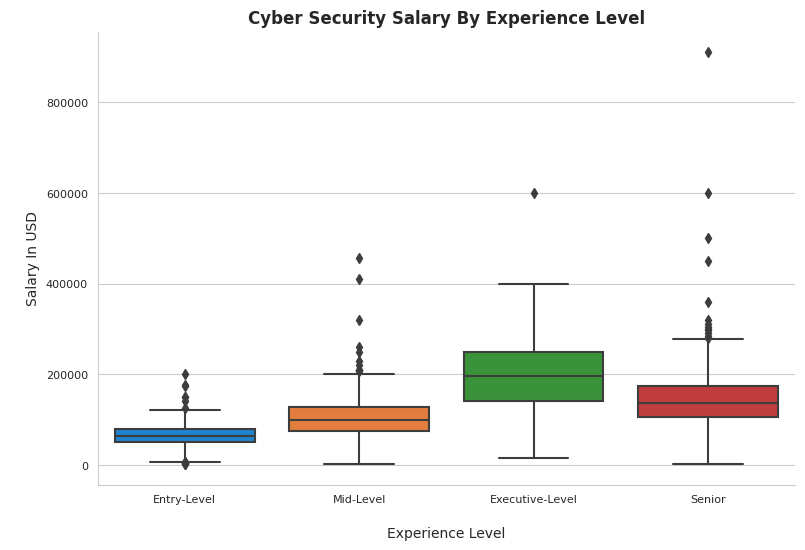

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
sns.boxplot(x=df1.experience_level, y=df1.salary_in_usd)
plt.xlabel("\nExperience Level")
plt.ylabel("\nSalary In USD")
sns.despine(top='True', right='True')
plt.title("Cyber Security Salary By Experience Level", fontweight="bold")
plt.show()

In [81]:
#Just to compare with graph above
df1.groupby("experience_level").get_group("Entry-Level").describe()['salary_in_usd']
df1.groupby("experience_level").get_group("Mid-Level").describe()['salary_in_usd']
df1.groupby("experience_level").get_group("Executive-Level").describe()['salary_in_usd']
df1.groupby("experience_level").get_group("Senior").describe()['salary_in_usd']

count       547.000000
mean     144560.239488
std       70199.336654
min        2764.000000
25%      105035.000000
50%      135600.000000
75%      175000.000000
max      910991.000000
Name: salary_in_usd, dtype: float64

# **Cyber Security Salary Based On Company Size**

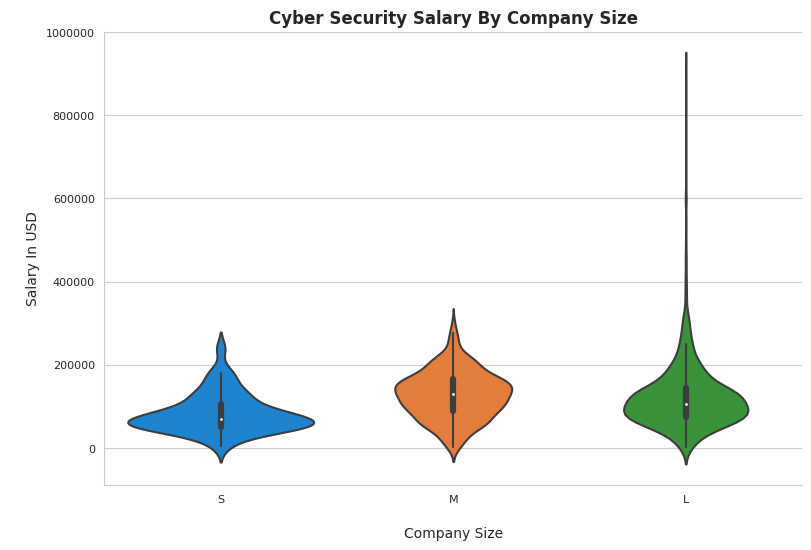

In [90]:
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
sns.violinplot(x=df1.company_size, y=df1.salary_in_usd)
plt.xlabel("\nCompany Size")
plt.ylabel("\nSalary In USD")
sns.despine(top='True', right='True')
plt.title("Cyber Security Salary By Company Size", fontweight="bold")
plt.show()

# **Cyber Security Salary Based On Employment Type**

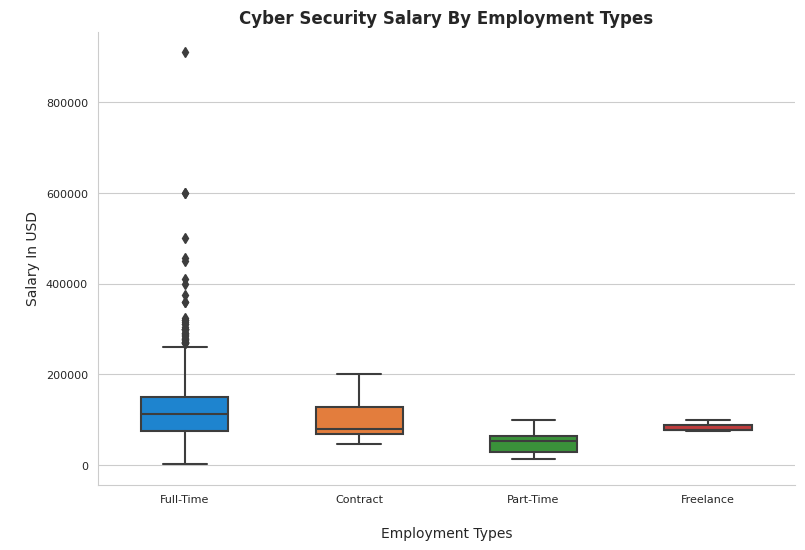

In [101]:
sns.set_style("whitegrid")
plt.figure(figsize= (9, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df1, width=0.5)
plt.xlabel("\nEmployment Types")
plt.ylabel("\nSalary In USD")
sns.despine(top='True', right='True')
plt.title("Cyber Security Salary By Employment Types", fontweight="bold")
plt.show()

# **Cyber Security Salary By Year**

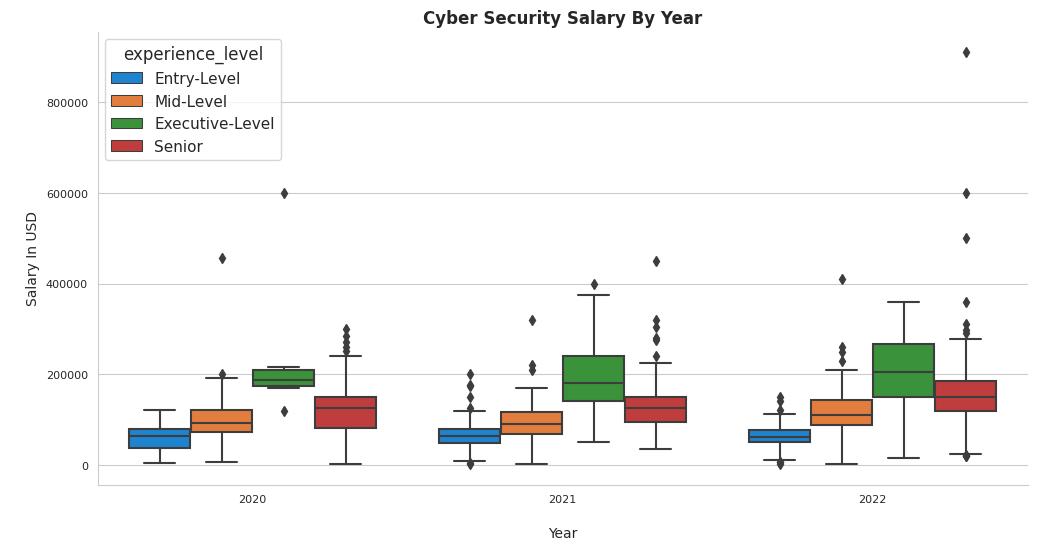

In [104]:
sns.set_style("whitegrid")
plt.figure(figsize= (12, 6))
sns.boxplot(x='work_year', y='salary_in_usd', hue='experience_level', data=df1)
plt.xlabel("\nYear")
plt.ylabel("\nSalary In USD")
sns.despine(top='True', right='True')
plt.title("Cyber Security Salary By Year", fontweight="bold")
plt.show()

# **CONCLUSION**
From the above **analysis**, the following insights were gained:


*   The highest filled role in Cyber Security is **Security Engineer** and the second is **Cyber Security Analyst**
*   The United States of America has maximum Jobs in the Cyber Security field
*   On Average Application Security Architect are the highest paid
*   Employees with Senior and Executive-Level of experience have the maximum salary
*   A Detection Engineer is the highest paid in the Cyber Security field
*   Majority of the Cyber Security employees make from 0 to 200,000 USD
*   Large sized companies pay their employees higher compared to small and medium sized companies
*   Full Time employees make more money in Cyber Security field



